# Modelos de Regresión Lineal

## A. Modelo con datos simulados

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [67]:
# Generemos un conjunto "X" de 100 valores distribuidos según N(1.5,2.5)
n = 100
X_mu = 1.5
X_sigma = 2.5 
X = X_sigma*np.random.randn(n) + X_mu

In [86]:
# Generemos también un conjunto de perturbaciones "res" distribuidos según N(0,0.8)
res_mu = 0.0
res_sigma = 0.0
res = res_mu + res_sigma*np.random.randn(n)
#res = np.random.uniform(0,0.8, n)

In [87]:
# Representemos un modelo de predicción lineal hipotético, con coeficientes alpha = 5.0 y beta = 1.9
alpha = 5.0
beta = 1.9
Y_e = alpha + beta*X

In [88]:
# Finalmente, representemos el modelo "real" considerando ahora las perturbaciones "res"
Y = alpha + beta*X + res

In [89]:
# Utilizando la información previa, construyamos un dataframe
data = pd.DataFrame(
    {
        "X": X.tolist(),
        "Y (observación)": Y.tolist(),
        "Y_e (predicción)": Y_e.tolist()
    }
)
data

,X,Y (observación),Y_e (predicción)
0,-2.611964,0.037269,0.037269
1,0.688124,6.307436,6.307436
2,4.045319,12.686106,12.686106
3,-1.608648,1.943569,1.943569
4,-1.828457,1.525932,1.525932
...,...,...,...
95,-1.611205,1.938710,1.938710
96,-0.876530,3.334593,3.334593
97,-1.743794,1.686791,1.686791
98,3.159960,11.003924,11.003924


(Text(0.5, 0, 'X'), Text(0, 0.5, 'Y'))

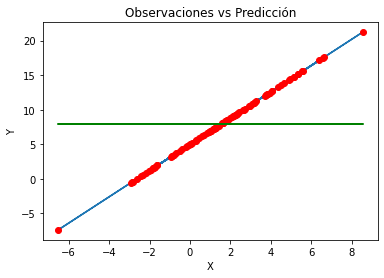

In [90]:
# Generemos la gráfica de los datos y del modelo de predicción
%matplotlib inline
plt.plot(X,Y_e)
plt.plot(X,Y,"ro")
Y_mean_lin = [np.mean(Y) for i in range (1, len(X) +1)]
plt.plot(X,Y_mean_lin,"g")
plt.title("Observaciones vs Predicción")
plt.xlabel("X"), plt.ylabel("Y")

## B. Evaluación del ajuste de una regresión lineal.
* Para poder evaluar que tan bueno es un modelo de regresión lineal, es importante analizarlo con respecto a tres estadísticos específicos:

* **Total de Sumas de Cuadrados (SST)**: este indica la suma de las diferencias cuadradas entre la variable dependiente *observada* $y_i$y su respectiva *media* $\bar{y}$. En otras palabras, este estadístico es una medida de la variabilidad total del conjunto de datos:

<div align="center">
	<font size=5>
        $SST=\sum_{i=1}^n{(y_i-\bar{y})^2}$
	<font/>
<div/>

* **Suma de Cuadrados debida a la Regresion (SSR)**: representa la suma de las diferencias cuadradas entre la variable dependiente *predecida* '$\hat{y_i}$' y la media de las observaciones $\bar{y}$. Esta medida describe que tan bién la linea de regresión se ajusta a los datos (mide la variabilidad explicada por la linea de regresión):

<div align="center">
	<font size=5>
        $SSR=\sum_{i=1}^n{(\hat{y_i}-\bar{y})^2}$
	<font/>
<div/>

* **Suma de Diferencias Cuadrados (SSD)**: esta medida representa la sumatoria de las diferencias cuadradas entre los valores *observados* y *predecidos* $y_i$ y $\hat{y_i}$, respectivamente (mide la variabilidad que no puede ser explicada por el modelo de regresión).

<div align="center">
	<font size=5>
        $SSD=\sum_{i=1}^n{(y_i-\hat{y_i})^2}$
	<font/>
<div/>

* Por su parte, es facil demostrar que la $SST$ es equivalente a la sumatoria de la $SSR$ y la $SSD$, es decir:

<div align="center">
	<font size=5>
        $SST=SSR+SSD$
	<font/>
<div/>

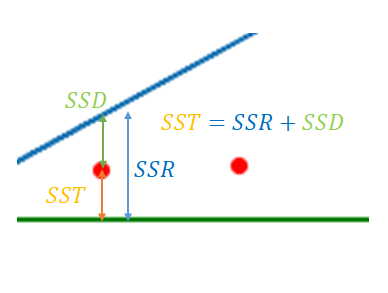

In [105]:
Image(filename="../resources/SST.png")

* De lo anterior, es facil ver que mientras mas pequeño sea la $SSD$ (el error total de predicción), mas similares serán los valores de la $SST$ y la $SSR$. Partiendo de este hecho, se define un estadístico útil para evaluar la bondad de ajuste de la regresión lineal conocido como **coeficiente de determinación**, el cual esta dado por:

<div align="center">
	<font size=5>
        $R^2=\frac{SSR}{SST}$
	<font/>
<div/>

In [92]:
# Calcularemos ahora los estadísticos de diferencias cuadradas para el modelo de regresión propuesto.
Y_mean = np.mean(Y)
SSR = np.sum((Y_e - Y_mean)**2)
SSD = np.sum((Y - Y_e)**2)
SST = np.sum((Y - Y_mean)**2)
print("SSR = ", SSR)
print("SSD = ", SSD)
print("SST = ", SST)

SSR =  2434.030165808351
SSD =  0.0
SST =  2434.030165808351


In [93]:
print("SST = SSR + SSD")
print("SSR + SSD = ", SSR + SSD)

SST = SSR + SSD
SSR + SSD =  2434.030165808351


In [94]:
# Calculemos el estadístico "R^2"
R2 = SSR/SST
print("R2 = ", R2)

R2 =  1.0


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
        -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ]),
 <BarContainer object of 20 artists>)

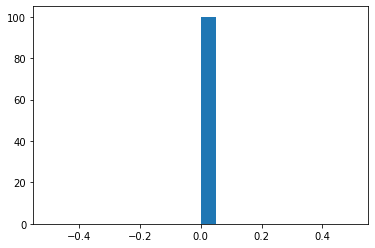

In [95]:
# Mostremos finalmente la distribución de los residuos "res"
plt.hist(Y_e-Y, bins=20)

## C. Cálculo del modelo de la Recta de Regresión
* Recordemos que la recta de regresión lineal para dos variables (independiente y dependiente) esta dada por un modelo paramétrico de la forma:

<div align="center">
	<font size=4>
        $Y_e(x)=\alpha+\beta x$
	<font/>
<div/>

* donde los parámetros $\alpha$ y $\beta$ se calculan como:

<div align="center">
	<font size=4>
        $\beta=\frac{\sum_{i=1}^n{(x_i-\bar{x})(y_i-\bar{y})}}{\sum_{i=1}^n{(x_i-\bar{x})^2}}$
	<font/>
<div/>

<div align="center">
	<font size=4>
        $\alpha = \bar{y}-\beta\bar{x}$
	<font/>
<div/>

In [96]:
# Calculemos los parámetros "alpha" y "beta" de la recta de regresión
X_mean = np.mean(X)
Y_mean = np.mean(Y)
print("X_mean = ", X_mean)
print("Y_mean = ", Y_mean)

X_mean =  1.5216490826582332
Y_mean =  7.891133257050644


In [97]:
beta = sum((X-X_mean)*(Y-Y_mean))/sum((X-X_mean)**2)
alpha = Y_mean - beta*X_mean
print("alpha = ", alpha)
print("beta = ", beta)

alpha =  5.000000000000001
beta =  1.9


In [98]:
# Definir el modelo de predicción utilizando los parámetros encontrados
Y_model = alpha + beta*X

(Text(0.5, 0, 'X'), Text(0, 0.5, 'Y'))

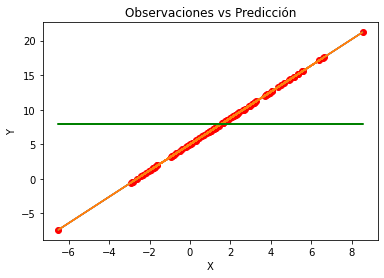

In [99]:
# Generar la gráfica de la regresión
plt.plot(X,Y,"ro")
plt.plot(X,Y_e)
plt.plot(X,Y_model)
Y_mean_lin = [np.mean(Y) for i in range (1, len(X) +1)]
plt.plot(X,Y_mean_lin,"g")
plt.title("Observaciones vs Predicción")
plt.xlabel("X"), plt.ylabel("Y")

In [100]:
# Calcular "SSR", "SSD" y "SST"
SSR = np.sum((Y_model - Y_mean)**2)
SSD = np.sum((Y - Y_model)**2)
SST = np.sum((Y - Y_mean)**2)
print("SSR = ", SSR)
print("SSD = ", SSD)
print("SST = ", SST)

SSR =  2434.0301658083513
SSD =  1.3647293660323504e-28
SST =  2434.030165808351


In [102]:
# Calculemos el estadístico "R^2"
R2 = SSR/SST
print("R2 = ", R2)

R2 =  1.0000000000000002


## E. Error estándar residual (RSE)

* El **error estándar residual (RSE)** se define como la *desviación típica* correspondiente al término de error $SSD$ (desviación de la parte de los datos que el modelo no es capáz de explicar).

* Para regresiones lineales simples, el $RSE$ se calcula como:

<div align="center">
	<font size=5>
        $RSE=\sqrt{\frac{SSD}{n-2}}$
	<font/>
<div/>

* Por otro lado, si se trata del $RSE$ para el caso de una regresión múltple de $k$ variables predictoras, se tiene que:

<div align="center">
	<font size=5>
        $RSE=\sqrt{\frac{SSD}{n-k-1}}$
	<font/>
<div/>

* Finalmente, es importante mencionar que el $RSE$ suele reportarse también como una proporción respecto a la media de las observaciones de la variable dependiente $y$ (lo cual nos da una idea del "ratio" (porcentaje) de error cometido en la predicción), de modo que:

<div align="center">
	<font size=5>
        $RSE_\% =\frac{RSE}{\bar{y}}$
	<font/>
<div/>

In [103]:
# Calculemos el "RSE" para el modelo de regresión lineal anteriormente construido.
RSE = np.sqrt(SSD/(len(X)-2))
print("RSE = ", RSE)

RSE =  1.180076686384108e-15


In [104]:
# Calculemos ahora el "RSE_%" para el modelo de regresión lineal anteriormente construido.
RSE_ratio = RSE/Y_mean
print("RSE_% = ", RSE_ratio)

RSE_% =  1.4954464054066277e-16
